DeltaSHAPE
==========

DeltaSHAPE analysis detects meaningful changes in SHAPE reactivity between two
samples. Parameters are optimized for detecting in cell vs. cell free protein
protections and enhancements, but they are flexible and useful for identifying
any kind of meaningful differences.

Import RNAvigate
----------------

In [1]:
import rnavigate as rnav


Create RNAvigate samples
------------------------

These example data are available as ready-to-go samples in the examples module.

I'll just verify the data keywords. DeltaSHAPE only requires "shapemap".

In [2]:
from rnavigate.examples import rnasep_1, rnasep_2
rnasep_1.print_data_keywords()
rnasep_2.print_data_keywords()


Example 1 data keywords:
  annotations:
  profiles:
    shapemap (default)
  structures:
    ss_ct (default)
    ss_pdb
    ss_lit
  interactions:
    shapejump (default)
    pairprob
    pairmap
    ringmap
  pdbs:
    pdb (default)

Example 2 data keywords:
  annotations:
  profiles:
    shapemap (default)
  structures:
    ss_ct (default)
    ss_pdb
    ss_lit
  interactions:
    shapejump (default)
    pairprob
    pairmap
    ringmap
  pdbs:
    pdb (default)



Perform and visualize deltaSHAPE analysis
-----------------------------------------

The DeltaSHAPE module provides functionality to quickly perform the analysis
and visualize results. The deltaSHAPE profile is the difference between rolling
average normalized SHAPE reactivities. Significant protections
(sample 1 > sample 2) are highlighted green. Significant enhancements
(sample 1 < sample 2) are highlighted purple.

The additional optional arguments and default values are commented out below.

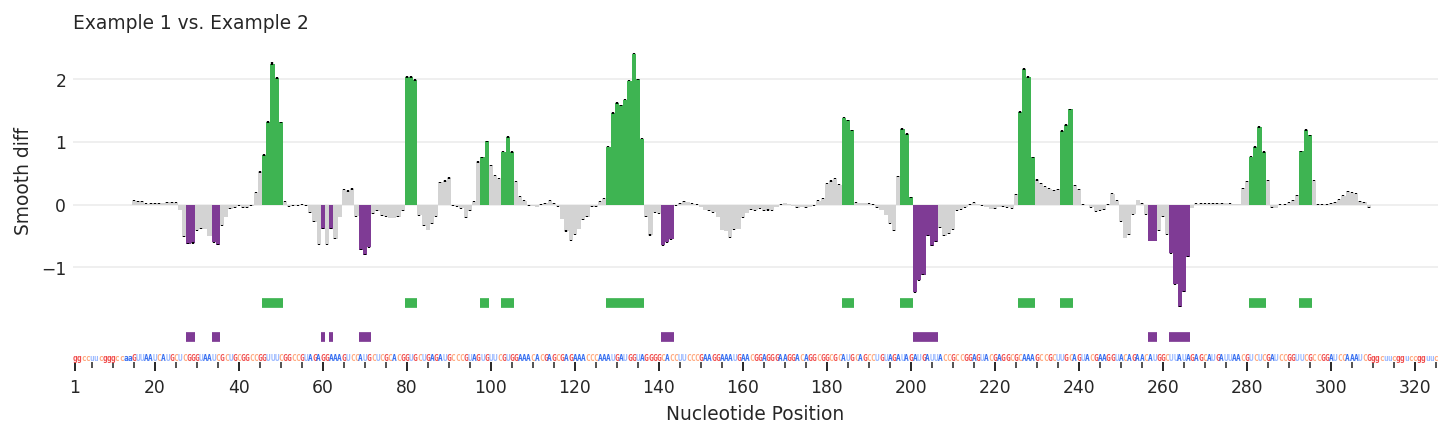

In [3]:
delta12 = rnav.analysis.DeltaSHAPE(
    sample1=rnasep_1,
    sample2=rnasep_2,
    # profile="shapemap",
    # smoothing_window=3,
    # zf_coeff=1.96,
    # ss_thresh=1,
    # site_window=3,
    # site_nts=2,
    )
delta12.plot()


The returned value is an RNAvigate Sample
-----------------------------------------

DeltaSHAPE analysis returns an RNAvigate Sample. This can be used to create
additional plots, and color or highlight significant protections and/or
enhancements.

DeltaSHAPE samples inherit all of the data keywords from sample 1 and 2. For
keywords that are shared between samples 1 and 2, sample 1 data is inherited.

New data keywords are:
- deltashape: the deltashape profile
- profile_1: the sample 1 profile
- profile_2: the sample 2 profile
- protections: an annotation of protections
- enhancements: an annotation of enhancements

In [4]:
delta12.print_data_keywords()


Example 1 vs. Example 2 data keywords:
  annotations:
    protections
    enhancements
  profiles:
    shapemap (default)
    deltashape
    profile_1
    profile_2
  structures:
    ss_ct (default)
    ss_pdb
    ss_lit
  interactions:
    shapejump (default)
    pairprob
    pairmap
    ringmap
  pdbs:
    pdb (default)



Using the Sample in other plots
-------------------------------

Below, I use the Sample returned from the DeltaSHAPE analysis to create an arc
plot. I want to view the new protections and enhancements annotations in the
context of the secondary structure and RINGs. These data keywords belong to the
parent sample, not the DeltaSHAPE sample, as shown above, but we can still use
them. RNAvigate will print a text warning when this happens.

In this plot, we can see that the biggest enhancements (purple) coincide with
the long-range pseudoknotted helices and long-range RING interactions. Maybe
there is a difference in the stability of this interaction between the two
samples.

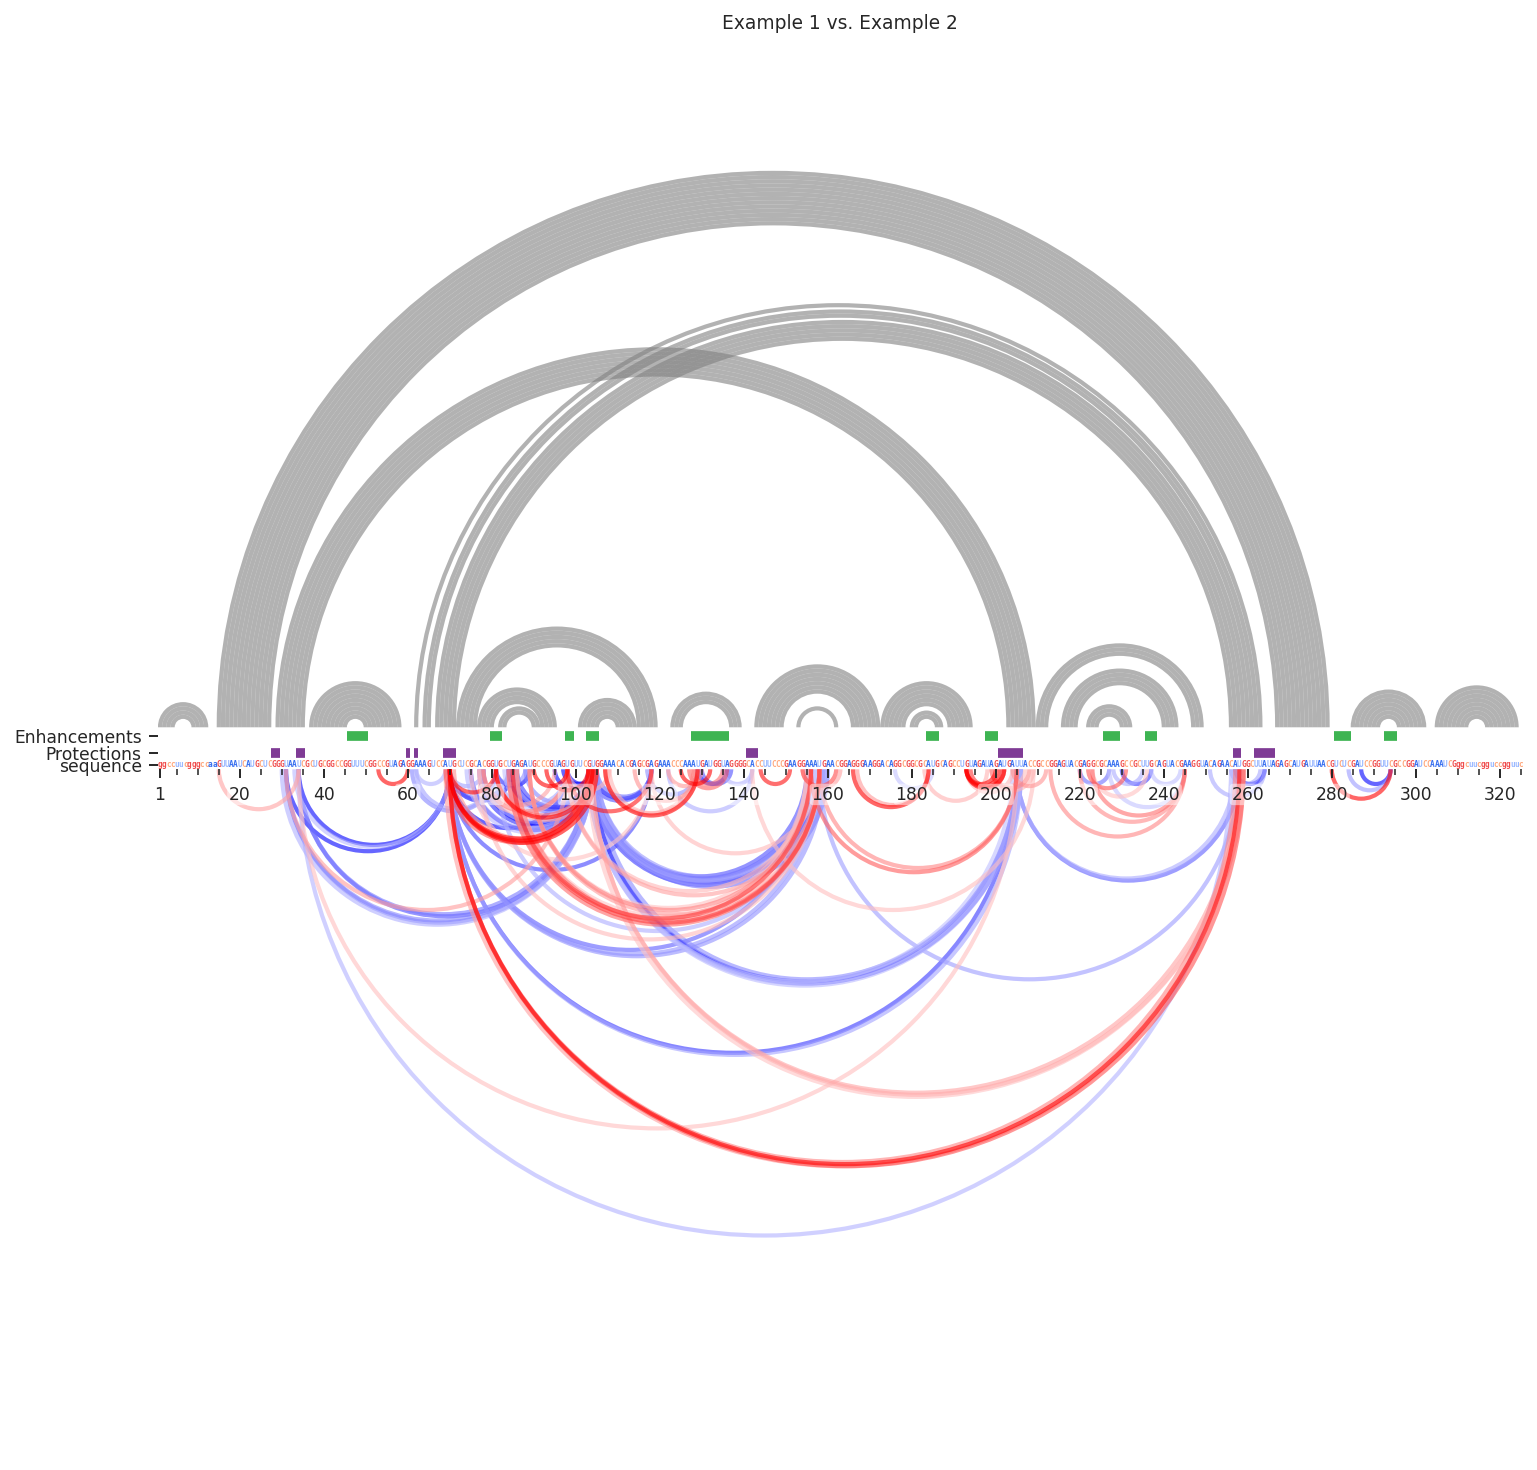

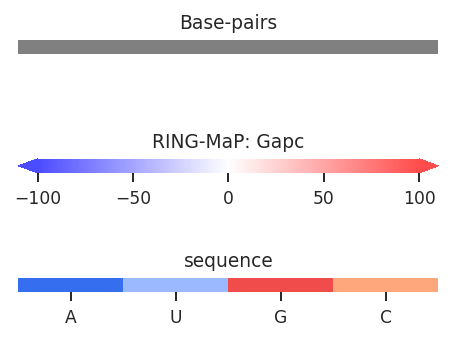

In [5]:
plot = rnav.plot_arcs(
    samples=[delta12],
    sequence='shapemap',
    profile_scale_factor=10,
    structure='ss_ct',
    interactions='ringmap',
    annotations=['protections', 'enhancements']
)


Help documentation
------------------

For more detailed information about the attributes of the DeltaSHAPE analysis
and DeltaSHAPEProfile, use the help command.

In [6]:
help(rnav.analysis.DeltaSHAPE)


Help on class DeltaSHAPE in module rnavigate.analysis.deltashape:

class DeltaSHAPE(rnavigate.rnavigate.Sample)
 |  DeltaSHAPE(sample1, sample2, profile='shapemap', smoothing_window=3, zf_coeff=1.96, ss_thresh=1, site_window=3, site_nts=2)
 |  
 |  Detects meaningful differences in chemical probing reactivity
 |  
 |  References
 |  ----------
 |  doi:10.1021/acs.biochem.5b00977
 |  
 |  Algorithm
 |  ---------
 |  1. Extract SHAPE-MaP sequence, normalized profile, and normalized
 |      standard error from given samples
 |  2. Calculated smoothed profiles (mean) and propagate standard errors
 |      over rolling windows
 |  3. Subtract raw and smoothed normalized profiles and propogate errors
 |  4. Calculate Z-factors for smoothed data. This is the magnitude of the
 |      difference relative to the standard error
 |  5. Calculate Z-scores for smoothed data. This is the magnitude of the
 |      difference in standard deviations from the mean difference
 |  6. Call sites. Called sites